In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f

In [158]:
df = pd.read_csv('../textfiles/HPRICE3.raw', delim_whitespace=True, header=None)

# Exo 1
Calculer la moyenne de price=100. Faire un histogramme de price=100. Faire ensuite
la régression de y = price=100 en fonction de
const; age; nbh; inst; rooms; area; land; baths; dist; y81. Interpreter le coefficient
associée à y81 en le comparant à l'augmentation du prix moyen de 1978 à 1981.

price mean = 961.0066043613705


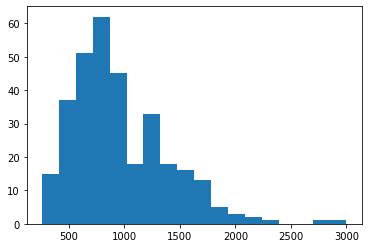

In [159]:
price = df[7]/100
print('price mean =', price.mean())
plt.hist(price,'auto')
plt.show;

In [160]:
s=np.shape(price)
const=np.ones(s)
age=df[1]
nbh=df[3]
inst=df[5]
rooms=df[8]
area=df[9]
land=df[10]
baths=df[11]
dist=df[12]
y81=df[15]
y=price
X=np.column_stack((const,age,nbh,inst,rooms,area,land,baths,dist,y81))
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      7   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     86.73
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           2.14e-79
Time:                        17:38:17   Log-Likelihood:                -2201.6
No. Observations:                 321   AIC:                             4423.
Df Residuals:                     311   BIC:                             4461.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -211.1428    105.234     -2.006      0.0

In [161]:
# Il y a 2 années de vente 78 et 81, y81 vaut 1 pour les ventes réalisées en 1981
masque = y81==0
p0 = np.mean(price[masque])
masque=y81==1
p1=np.mean(price[masque])
print("Variation du prix moyen de 1978 à 1981 : {0:6.2f}".format(p1-p0))

Variation du prix moyen de 1978 à 1981 : 440.19


La variation due à y81(variable x9) est de 358.65 (coef * (1(81) - 0(78)).  
Il reste donc 81.54 qui n'est pas expliqué par "l'inflation".

# Exo 2
Tester l'hypothèse d'homoscédasticité en utilisant la régression de u**2 en fonction des
variables du modèles.

In [162]:
u=results.resid
u2=u**2

model=sm.OLS(u2,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     13.53
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           2.57e-18
Time:                        17:38:17   Log-Likelihood:                -4234.7
No. Observations:                 321   AIC:                             8489.
Df Residuals:                     311   BIC:                             8527.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.307e+04   5.93e+04      0.389      0.6

On lit la pvalue (Prob (F-statistic)) à 2.57e-18 donc on rejette $H_0$ l'hypothèse d'homoscédasticité.  
F=13.53  
On voit P>|t| de x5(area) et x6(land) = 0 donc ce sont ceux qu'il faut regarder.

# Exo 3

Tester l’hypothèse $H_0$ : $\theta_{area}$ = $\theta_{land} = 0$

#### Modèle non contraint

In [163]:
X0=np.column_stack((const,age,nbh,inst,rooms,area,land,baths,dist,y81))
y=price
model=sm.OLS(y,X0)
results = model.fit()
u=results.resid

u2=u**2
model=sm.OLS(u2,X0)
results = model.fit()
u=results.resid
SSR0 = u.T @ u

#### Modèle contraint

In [164]:
# on retire du modèle area et land
X1=np.column_stack((const,age,nbh,inst,rooms,baths,dist,y81))

# on garde le même u2
model=sm.OLS(u2,X1)
results = model.fit()
v=results.resid
SSR1=v.T@v

In [165]:
n,k=np.shape(X0)
F=((SSR1-SSR0)/2)/(SSR0/(n-k))

print('pvalue', f.sf(F,2,n-k) )
print('Fisher', F)

pvalue 3.908173420198508e-18
Fisher 45.72369277605203


F=45.72.  
On rejette l'hypothèse $H_0$ (pvalue < 0.01).

# Exo 4
Donner la valeur minimale et maximale de baths. Transformer ensuite la variable
baths en un ensemble de variables binaires. Refaire le test d'hétéroscédasticité de
l'exercice 2.

In [166]:
print("nbr de baths entre {} et {}".format(baths.min(), baths.max()))

nbr de baths entre 1 et 4


In [167]:
# on décide de ne pas gérer le cas baths = 1
baths2=np.asarray([baths == 2]).reshape(-1,1)
baths3=np.asarray([baths == 3]).reshape(-1,1)
baths4=np.asarray([baths == 4]).reshape(-1,1)

In [168]:
X=np.column_stack((const,age,nbh,inst,rooms,area,land,baths2,baths3,baths4,dist,y81))
y=price

model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      7   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     72.22
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.33e-78
Time:                        17:38:17   Log-Likelihood:                -2198.8
No. Observations:                 321   AIC:                             4422.
Df Residuals:                     309   BIC:                             4467.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.3626    113.493     -0.312      0.7

Gain de 248.54 et 305.27 pour nbr de sdb = 3 ou 4

#### Test d'hétéroscédasticité

In [169]:
u=results.resid
u2=u**2

model=sm.OLS(u2,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     10.97
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           3.93e-17
Time:                        17:38:17   Log-Likelihood:                -4227.2
No. Observations:                 321   AIC:                             8478.
Df Residuals:                     309   BIC:                             8524.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7663.0126    6.3e+04      0.122      0.9

F=10.97  
On rejette l'hypothèse $H_0$ (pvalue=3.93e-17 < 0.01).

# Exo 5
En utilisant la spécification de l'exercice 4, refaire le test d'hétéroscédasticité en
utilisant log(area) et log(land).

In [170]:
log_area = np.log(area)
log_land = np.log(land)

In [171]:
X=np.column_stack((const,age,nbh,inst,rooms,log_area,log_land,baths2,baths3,baths4,dist,y81))
y=price

In [172]:
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      7   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     69.51
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           8.66e-77
Time:                        17:38:17   Log-Likelihood:                -2203.2
No. Observations:                 321   AIC:                             4430.
Df Residuals:                     309   BIC:                             4476.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3479.2455    460.500     -7.555      0.0

#### Test d'hétéroscédasticité

In [173]:
u=results.resid
u2=u**2

model=sm.OLS(u2,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     5.419
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           6.86e-08
Time:                        17:38:17   Log-Likelihood:                -4281.0
No. Observations:                 321   AIC:                             8586.
Df Residuals:                     309   BIC:                             8631.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.44e+06   2.98e+05     -4.831      0.0

F=5.419  
On rejette l'hypothèse $H_0$ (pvalue=6.86e-08 < 0.01).

# Exo 6
En utilisant la spécification de l’exercice 5, refaire le test d’hétéroscédasticité en utilisant $y = log(\frac{price}{100})$ .

In [174]:
y = np.log(price)
X=np.column_stack((const,age,nbh,inst,rooms,log_area,log_land,baths2,baths3,baths4,dist,y81))

In [175]:
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      7   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           3.52e-96
Time:                        17:38:17   Log-Likelihood:                 56.624
No. Observations:                 321   AIC:                            -89.25
Df Residuals:                     309   BIC:                            -43.99
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3297      0.403      5.774      0.0

#### Test d'hétéroscédasticité

In [176]:
u=results.resid
u2=u**2

model=sm.OLS(u2,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.905
Date:                Sun, 01 Mar 2020   Prob (F-statistic):             0.0381
Time:                        17:38:17   Log-Likelihood:                 268.51
No. Observations:                 321   AIC:                            -513.0
Df Residuals:                     309   BIC:                            -467.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4437      0.209     -2.128      0.0

F=1.905  
On rejette l'hypothèse $H_0$ à 5% (pvalue=0.0381 < 0.05).

# Exo 7
Utiliser la variable log_land pour pondérer les observations dans la spécification de
l'exercice 6.  
Refaire le test d’hétéroscédasticité.

In [177]:
h=np.sqrt(log_land)
y=np.log(price)
X=np.column_stack((const,age,nbh,inst,rooms,log_area,log_land,baths2,baths3,baths4,dist,y81))
model=sm.WLS(y,X,weight=1/h)
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      7   R-squared:                       0.785
Model:                            WLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           3.52e-96
Time:                        17:38:17   Log-Likelihood:                 56.624
No. Observations:                 321   AIC:                            -89.25
Df Residuals:                     309   BIC:                            -43.99
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3297      0.403      5.774      0.0

#### Test d'hétéroscédasticité

In [178]:
u=results.resid
u2=u**2

model=sm.OLS(u2,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.905
Date:                Sun, 01 Mar 2020   Prob (F-statistic):             0.0381
Time:                        17:38:17   Log-Likelihood:                 268.51
No. Observations:                 321   AIC:                            -513.0
Df Residuals:                     309   BIC:                            -467.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4437      0.209     -2.128      0.0

F=1.905  
On rejette l'hypothèse $H_0$ à 5% (pvalue=0.0381 < 0.05).
## je ne comprends pas les résultats sont identiques entre Exo 6 et Exo7 (avec poids)...

# Exo 8
Faire le graphique en nuage de point entre log(price/100) et log_land.   
Diviser l’échantillon en deux groupes en fonction de lland et refaire le test d’hétéroscédasticité pour les deux sous-groupes.  
Construction de deux groupes : log_land <= 10 et log_land > 10.

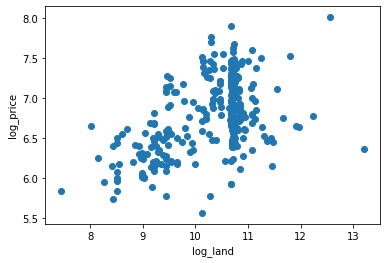

In [179]:
log_price=np.log(price)
plt.scatter(log_land,log_price)
plt.xlabel("log_land")
plt.ylabel("log_price")
plt.show()

#### Groupe : log_land <= 10 

In [180]:
y=np.log(price)
X=np.column_stack((const,age,nbh,inst,rooms,log_area,log_land,baths2,baths3,baths4,dist,y81))

masque = log_land <= 10
y=y[masque]
X=X[masque,:]

In [181]:
model=sm.OLS(y,X)
results = model.fit()
#print(results.summary())
u=results.resid
u2=u**2

model=sm.OLS(u2,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.072
Method:                 Least Squares   F-statistic:                    0.3985
Date:                Sun, 01 Mar 2020   Prob (F-statistic):              0.944
Time:                        17:38:17   Log-Likelihood:                 146.43
No. Observations:                  91   AIC:                            -270.9
Df Residuals:                      80   BIC:                            -243.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0750      0.195     -0.384      0.7

F=0.3985  
On ne rejette pas l'hypothèse $H_0$ (pvalue=0.944 > 0.05).

#### Groupe : log_land > 10 

In [182]:
y=np.log(price)
X=np.column_stack((const,age,nbh,inst,rooms,log_area,log_land,baths2,baths3,baths4,dist,y81))

masque = log_land > 10
y=y[masque]
X=X[masque,:]

In [183]:
model=sm.OLS(y,X)
results = model.fit()
#print(results.summary())
u=results.resid
u2=u**2

model=sm.OLS(u2,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.373
Date:                Sun, 01 Mar 2020   Prob (F-statistic):              0.187
Time:                        17:38:17   Log-Likelihood:                 165.68
No. Observations:                 230   AIC:                            -307.4
Df Residuals:                     218   BIC:                            -266.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3093      0.396     -0.781      0.4

F=1.373  
On ne rejette pas l'hypothèse $H_0$ (pvalue=0.187 > 0.05).